# Clasificación por SVM y Neural Networks
**Alumno: Sinahi Dionisio Ortega**
**Matería:** Aprendizaje Automatico

Librerias utilizadas para los modelos 

In [1]:
#Librerias basicas
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm

#Manejo de representaciones visuales
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

#Preprocesamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Métricas
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold #K-Folds cross-validator
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.metrics import classification_report


#SVM
from sklearn import svm
import random
from sklearn.model_selection import GridSearchCV

# NN 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings("ignore")

2023-03-08 18:38:01.970926: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 18:38:05.308345: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/sinahi/anaconda3/envs/ML_study/lib/
2023-03-08 18:38:05.308837: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/sinahi/anaconda3/envs/ML_study/lib/
2023-03-08 18:38:05.308881: W tensorflow/com

# Análisis descriptivo de los datos

In [2]:
df_model =pd.read_csv("train.csv")
df_model.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df_model.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df_model.dtypes.value_counts() 

int64      19
float64     2
dtype: int64

Variable de interes

In [6]:
df_model["price_range"].unique()

array([1, 2, 3, 0])

In [7]:
df_model["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

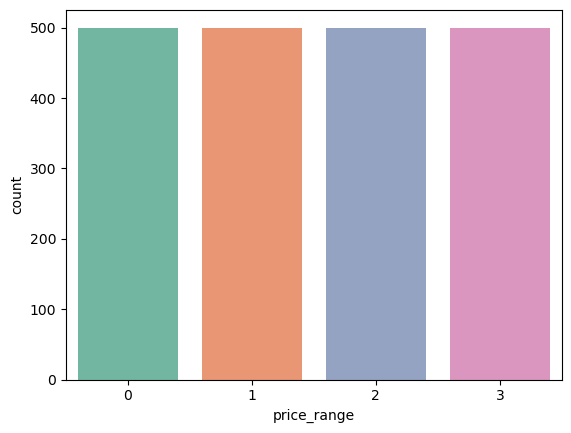

In [8]:
sns.countplot(x='price_range', data= df_model,palette='Set2')
plt.show()

In [9]:
var_cate= ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']
var_cate

['blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [10]:
var_num=[]
for i in df_model.columns:
    if i not in var_cate:
        var_num.append(i)

In [11]:
var_num

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

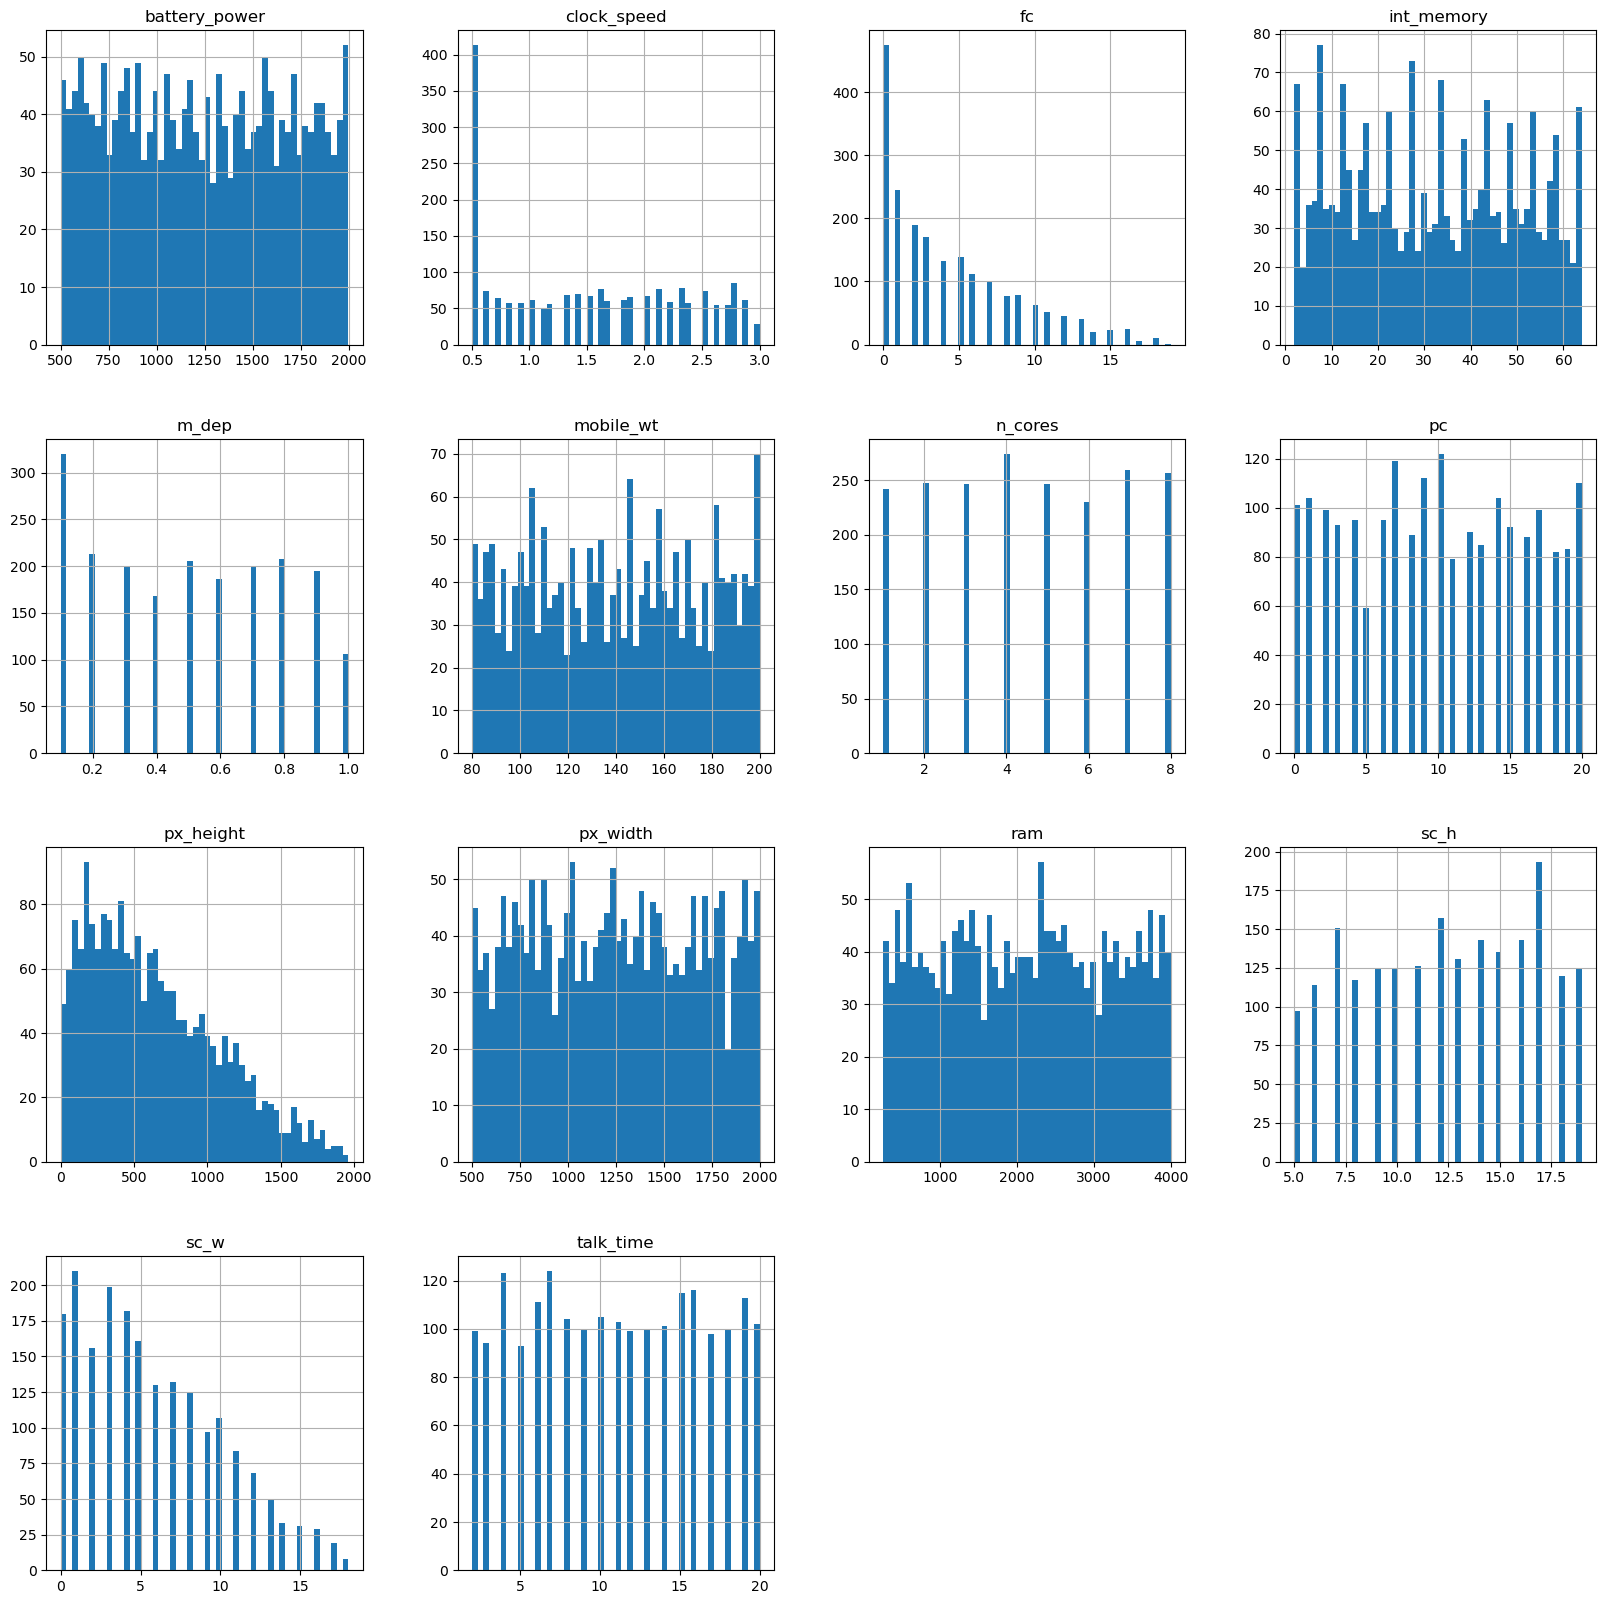

In [12]:
df_model[var_num].hist(bins=50, figsize=(20,20))
plt.show()

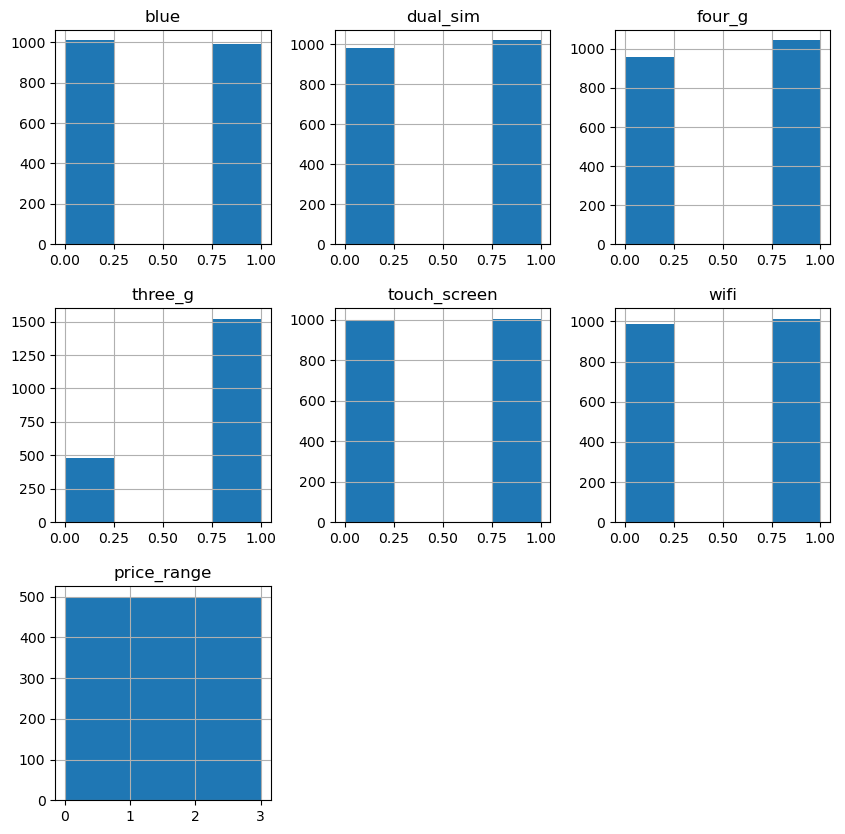

In [13]:
df_model[var_cate].hist(bins=4, figsize=(10,10))
plt.show()

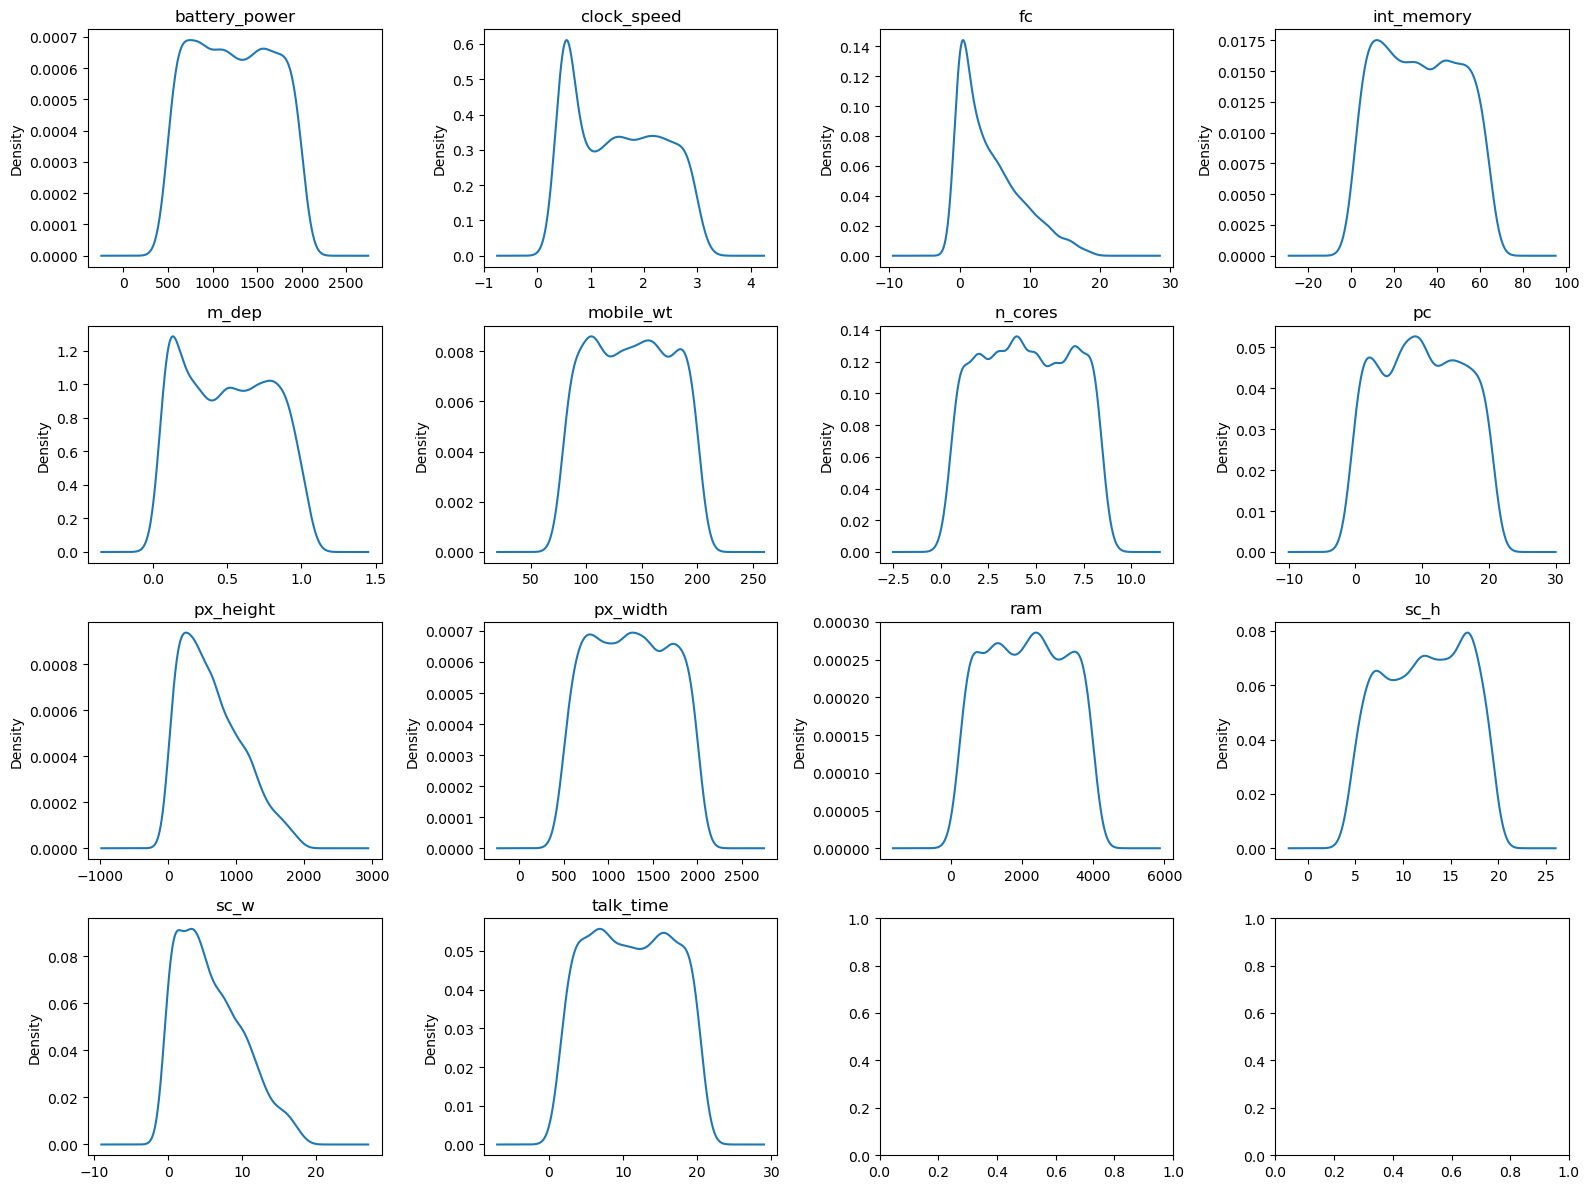

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))

for i, col in enumerate(var_num):
    ax = axes[i//4, i%4]
    df_model[col].plot(kind='kde', ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

## Matriz de correlación

In [15]:
df_mc=df_model.corr()['price_range'].sort_values(ascending=False)
df_mc.head(10)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
Name: price_range, dtype: float64

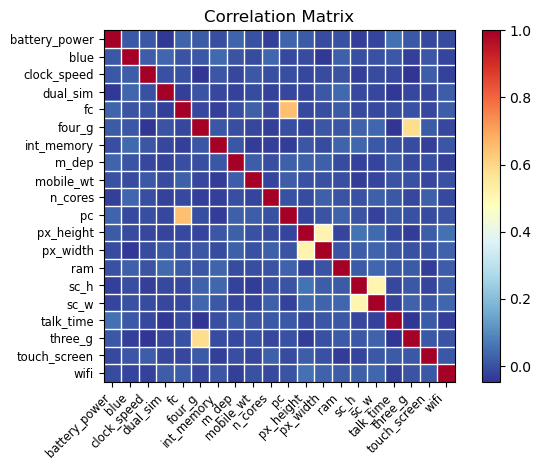

In [16]:
corr = df_model.set_index('price_range').corr() 
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

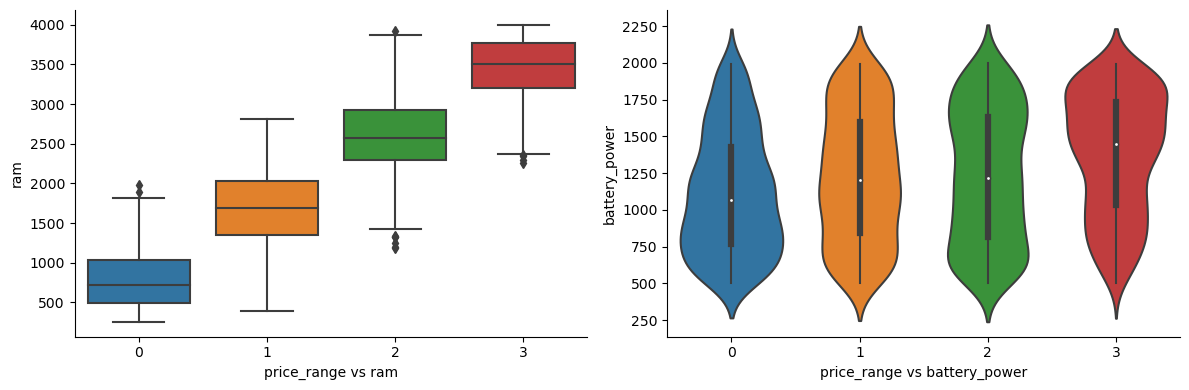

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.boxplot(x=df_model['price_range'],y=df_model["ram"], ax=axs[0])
sns.despine(ax=axs[0])
axs[0].set_xlabel('price_range vs ram')

sns.violinplot(x=df_model['price_range'],y=df_model["battery_power"], ax=axs[1])
sns.despine(ax=axs[1])
axs[1].set_xlabel('price_range vs battery_power')

plt.tight_layout()
plt.show()

## Tratamiento de valores nulos

In [18]:
df_null=df_model.isnull().sum().sort_values(ascending=False)
df_null.head(21)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64

<AxesSubplot: >

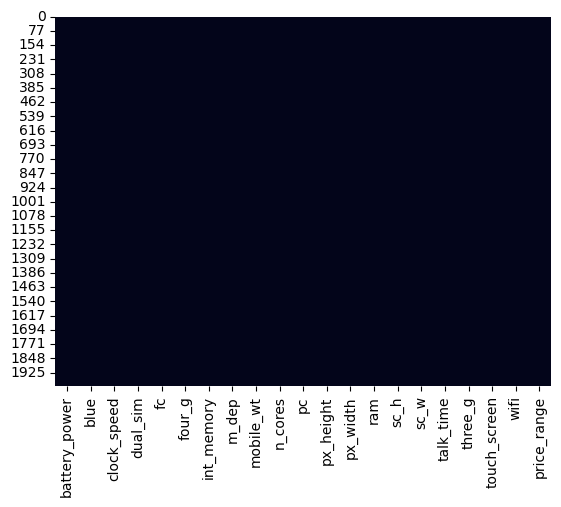

In [19]:
sns.heatmap(df_model.isnull(), cbar=False)

## Escalado

In [20]:
X= df_model.drop(['price_range'], axis=1)
Y= df_model['price_range']

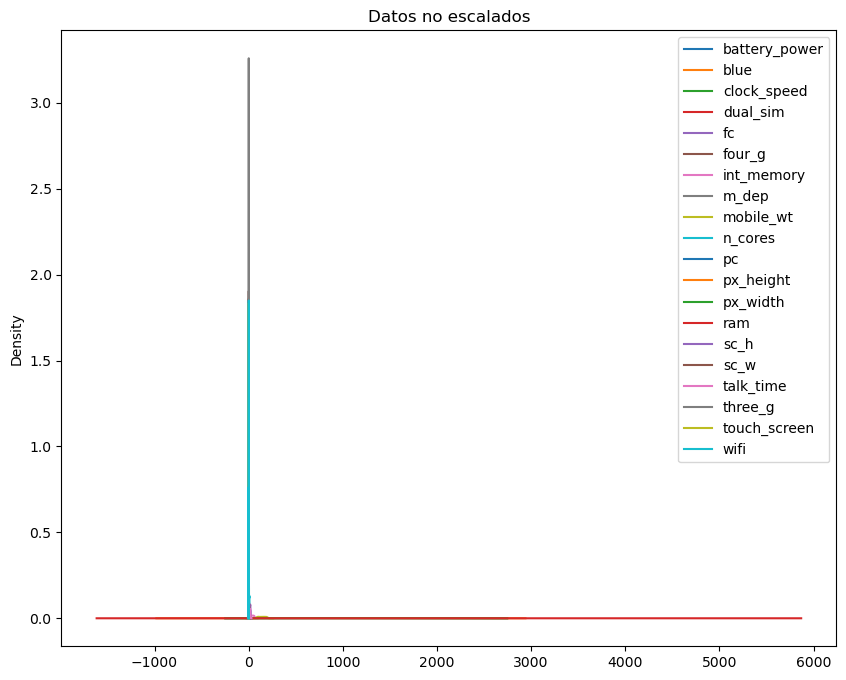

In [21]:
X.plot(kind='kde', figsize=(10, 8))
plt.title("Datos no escalados")
  
plt.show()

## Normalización de datos 

In [22]:
#Normalizamos los datos
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
Xn = mms.fit_transform(X)
dfScaled = pd.DataFrame(Xn)

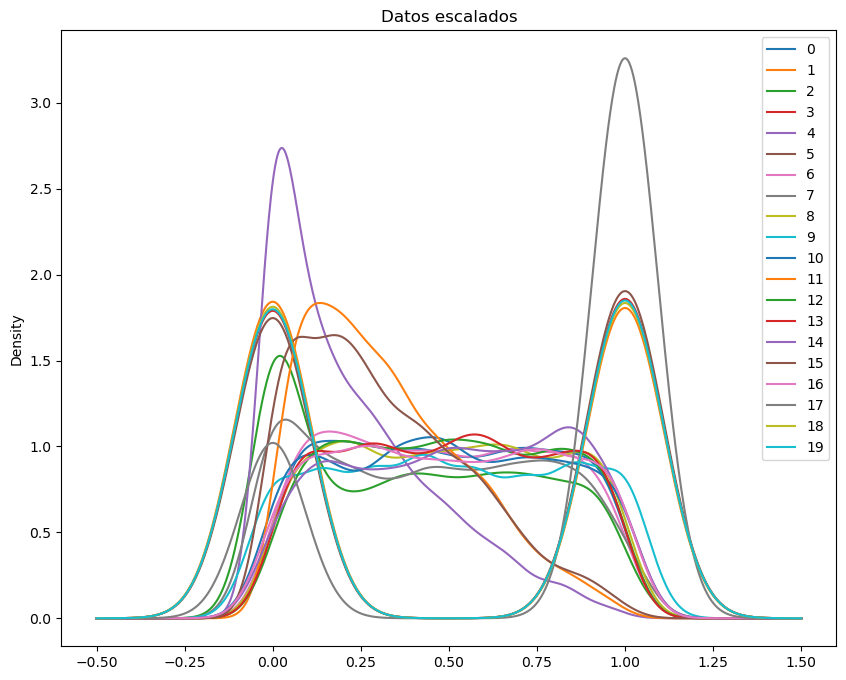

In [23]:
# dfScaled.hist(bins=50, figsize=(20,20))
# plt.show()
dfScaled.plot(kind='kde', figsize=(10, 8))
plt.title("Datos escalados")
  
plt.show()

In [24]:
# from sklearn.preprocessing import StandardScaler
# stsc= StandardScaler()
# Xs= stsc.fit_transform(X)
# dfStscaled = pd.DataFrame(Xs)

## Separación de datos entrenamiento y test

In [25]:
x_train, x_test, y_train, y_test = train_test_split(Xn,Y, test_size=0.20, random_state=0)

# Solución con maquinas de vectores de soporte

In [26]:
clf = svm.SVC(C=5, kernel = 'linear', probability = True)
#The 'kernel' parameter of SVC must be a str among {'sigmoid', 'poly', 'precomputed', 'linear', 'rbf'} or a callable. Got 'Polynomial' instead.

In [27]:
SVMmodel=clf.fit(x_train, y_train)
SVMmodel

SVC(C=5, kernel='linear', probability=True)

In [28]:
kf = KFold(n_splits=5) #número de iteraciones
puntuaciones_DTC = cross_val_score(SVMmodel, x_train, y_train, cv=kf, scoring="accuracy")
print("Métricas de cross_validation", puntuaciones_DTC)

Métricas de cross_validation [0.965625 0.946875 0.940625 0.93125  0.965625]


In [29]:
ypred = SVMmodel.predict(x_test)

In [30]:
print(classification_report(y_test, ypred,zero_division=0))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.95      0.94        92
           2       0.96      0.91      0.93        99
           3       0.97      0.99      0.98       114

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [31]:
cm_svm=confusion_matrix(
    y_true = y_test,
    y_pred = ypred
)

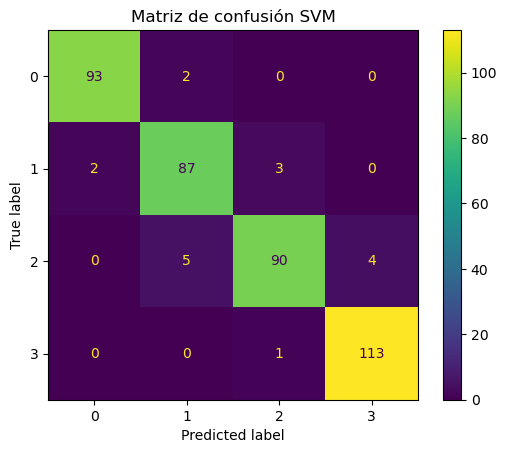

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.title("Matriz de confusión SVM")
plt.show()

In [33]:
accuracy = accuracy_score(y_true = y_test, y_pred = ypred, normalize=True)
print(f"El accuracy de test es: {100*accuracy}%")

El accuracy de test es: 95.75%


In [34]:
precision = precision_score(y_true = y_test, y_pred = ypred, average=None, zero_division=0)
print(f"La precisión del test es:{100*precision}%")

La precisión del test es:[97.89473684 92.55319149 95.74468085 96.58119658]%


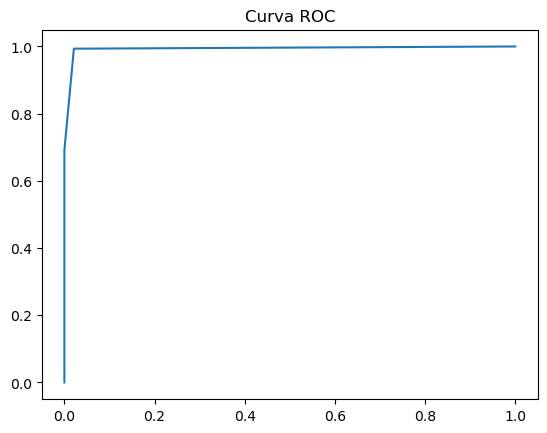

valor de AUC 0.006522864538395184


In [35]:
fpr, tpr, thesholds = metrics.roc_curve(y_test, ypred, pos_label=0)
#print ROC curve
plt.title("Curva ROC")
plt.plot(tpr,fpr)
plt.show()

#print AUC
auc = np.trapz(tpr,fpr)
print('valor de AUC', auc)

# Solución por Redes neuronales

In [36]:
# codificar etiquetas de salida
Yn = tf.keras.utils.to_categorical(Y, num_classes=4)
Yn

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(Xn,Yn, test_size=0.20, random_state=0)

In [38]:
# crear modelo secuencial
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, input_shape=(20,), activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

2023-03-08 18:38:22.054245: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-08 18:38:22.124824: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-08 18:38:22.126175: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-08 18:38:22.130194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [39]:
# compilar modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [40]:
NNT = model.fit(X_train, Y_train, epochs=150, validation_split=0.2)

Epoch 1/150


2023-03-08 18:38:27.001118: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f29162222d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-08 18:38:27.001189: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce 930MX, Compute Capability 5.0
2023-03-08 18:38:27.046621: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-08 18:38:27.538140: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-08 18:38:27.767308: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 [==============================] - 5s 11ms/step - loss: 1.3884 - accuracy: 0.2719 - val_loss: 1.3828 - val_accuracy: 0.2531
Epoch 2/150
40/40 [==============================] - 0s 9ms/step - loss: 1.3632 - accuracy: 0.3109 - val_loss: 1.3635 - val_accuracy: 0.3031
Epoch 3/150
40/40 [==============================] - 0s 8ms/step - loss: 1.3355 - accuracy: 0.3492 - val_loss: 1.3350 - val_accuracy: 0.3469
Epoch 4/150
40/40 [==============================] - 0s 12ms/step - loss: 1.2923 - accuracy: 0.3914 - val_loss: 1.2868 - val_accuracy: 0.4062
Epoch 5/150
40/40 [==============================] - 0s 11ms/step - loss: 1.2185 - accuracy: 0.4750 - val_loss: 1.2023 - val_accuracy: 0.4625
Epoch 6/150
40/40 [==============================] - 1s 13ms/step - loss: 1.1095 - accuracy: 0.5445 - val_loss: 1.0744 - val_accuracy: 0.5813
Epoch 7/150
40/40 [==============================] - 1s 13ms/step - loss: 0.9857 - accuracy: 0.6289 - val_loss: 0.9509 - val_accuracy: 0.6531
Epoch 8/150
40/40 [=

40/40 [==============================] - 1s 14ms/step - loss: 0.0684 - accuracy: 0.9836 - val_loss: 0.1041 - val_accuracy: 0.9688
Epoch 116/150
40/40 [==============================] - 1s 13ms/step - loss: 0.0643 - accuracy: 0.9828 - val_loss: 0.1040 - val_accuracy: 0.9625
Epoch 117/150
40/40 [==============================] - 1s 14ms/step - loss: 0.0623 - accuracy: 0.9867 - val_loss: 0.1081 - val_accuracy: 0.9563
Epoch 118/150
40/40 [==============================] - 0s 12ms/step - loss: 0.0636 - accuracy: 0.9828 - val_loss: 0.1079 - val_accuracy: 0.9594
Epoch 119/150
40/40 [==============================] - 0s 10ms/step - loss: 0.0671 - accuracy: 0.9836 - val_loss: 0.1078 - val_accuracy: 0.9500
Epoch 120/150
40/40 [==============================] - 0s 12ms/step - loss: 0.0650 - accuracy: 0.9844 - val_loss: 0.1084 - val_accuracy: 0.9563
Epoch 121/150
40/40 [==============================] - 1s 14ms/step - loss: 0.0633 - accuracy: 0.9867 - val_loss: 0.1000 - val_accuracy: 0.9656
Epoch 

In [41]:
Ynn_pred = model.predict(X_test)

13/13 [==============================] - 0s 3ms/step


In [42]:
Ynn_pred

array([[2.1739532e-29, 1.6965262e-13, 4.7720238e-03, 9.9522793e-01],
       [9.9998033e-01, 1.9711879e-05, 1.5467511e-15, 9.6159540e-37],
       [3.6534661e-13, 6.6286786e-03, 9.9337113e-01, 2.3285807e-07],
       ...,
       [9.9999762e-01, 2.3562809e-06, 1.0889782e-17, 0.0000000e+00],
       [1.6805374e-21, 1.6125282e-08, 8.5372299e-01, 1.4627697e-01],
       [9.4268906e-01, 5.7310920e-02, 1.7684352e-08, 2.7070286e-23]],
      dtype=float32)

In [43]:
Ynn=[np.argmax(i) for i in Ynn_pred]
Ynn;

In [44]:
Ytest=[np.argmax(out) for out in Y_test]
Ytest;

In [45]:
cm_nn=confusion_matrix(
    y_true = Ytest,
    y_pred = Ynn
)

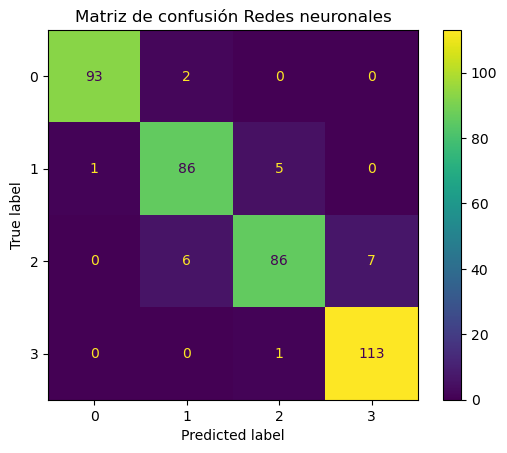

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot()
plt.title("Matriz de confusión Redes neuronales")
plt.show()

In [47]:
print(classification_report(Ytest,Ynn,zero_division=0))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.91      0.93      0.92        92
           2       0.93      0.87      0.90        99
           3       0.94      0.99      0.97       114

    accuracy                           0.94       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



In [48]:
accuracy = accuracy_score(y_true = Ytest, y_pred = Ynn, normalize=True)
print(f"El accuracy de test es: {100*accuracy}%")

El accuracy de test es: 94.5%


In [49]:
precision = precision_score(y_true = Ytest, y_pred = Ynn, average=None, zero_division=0)
print(f"La precisión del test es:{100*precision}%")

La precisión del test es:[98.93617021 91.4893617  93.47826087 94.16666667]%


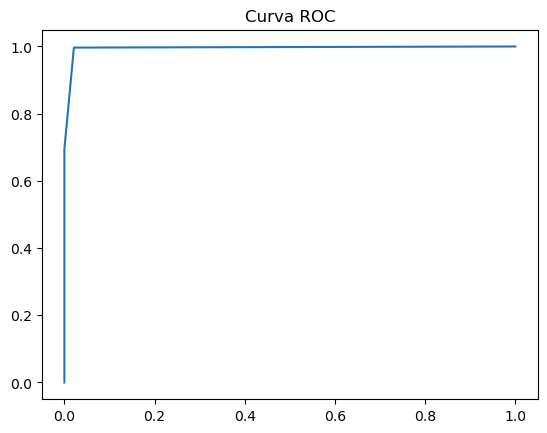

AUC 0.004849007765314906


In [50]:
fpr, tpr, thesholds = metrics.roc_curve(Ytest, Ynn, pos_label=0)
#print ROC curve
plt.title("Curva ROC")
plt.plot(tpr,fpr)
plt.show()

#print AUC
auc = np.trapz(tpr,fpr)
print('AUC', auc)